In [25]:
%load_ext autoreload
%autoreload 2

from utils import load_input_image
import matplotlib.pyplot as plt
from segmentation import Segmentation
from classification import Classification
from features_extraction import FeaturesExtraction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PIECES PROBLEMATIQUES : 
- train : 
    - 2 (en même temps les pièces noirs ça ce classify pas )
    - 8(avec toutes les methodes problématiques, problème avec les arc-en-ciel avec la ligne au milieu)
- train2 : tout ok 

In [26]:
imgs = {i: load_input_image(i,folder="train") for i in range(15)}

In [27]:
n = 2
img = imgs[n]

seg = Segmentation(img)
seg.find_pieces()

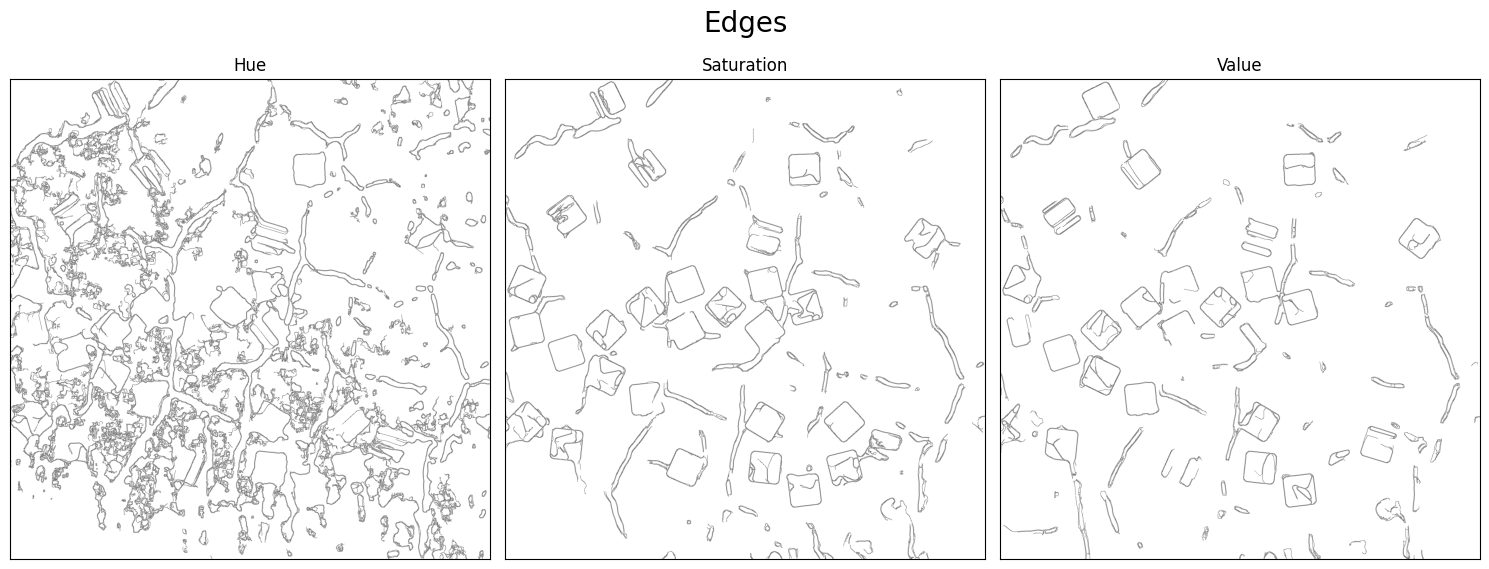

In [28]:
seg.plot_edges()

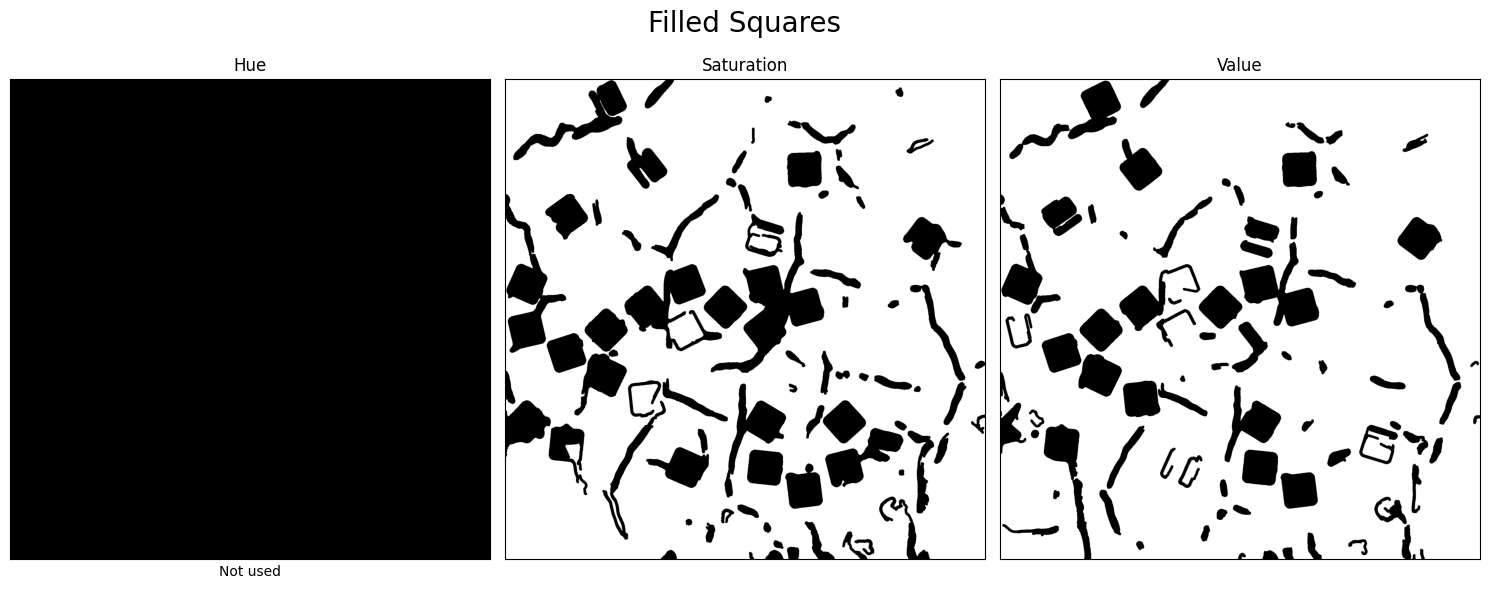

In [29]:
seg.plot_filled_squares()

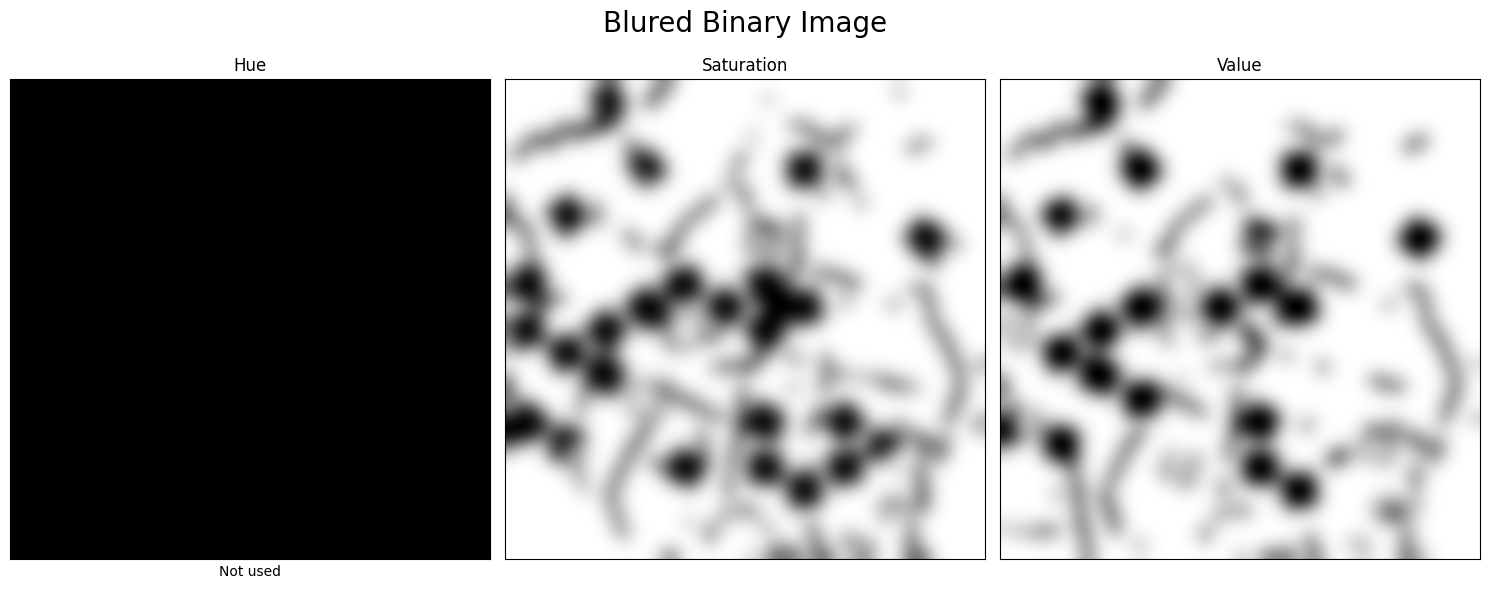

In [30]:
seg.plot_blur()

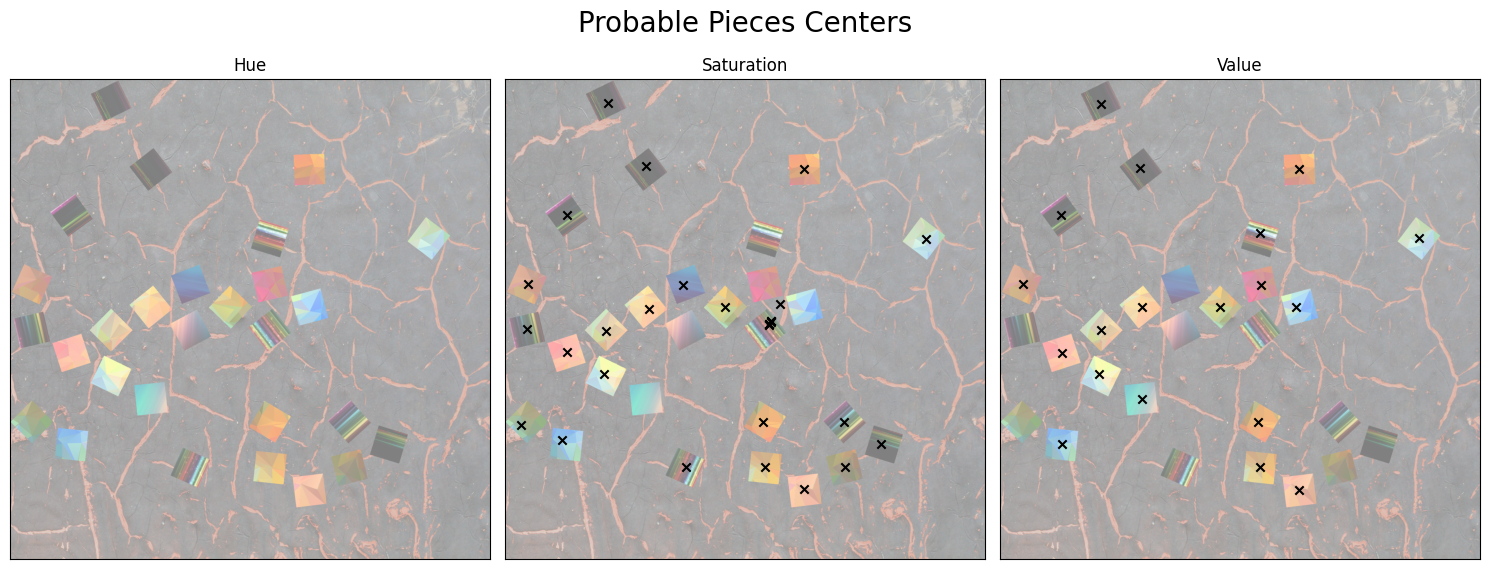

In [31]:
seg.plot_RoI()

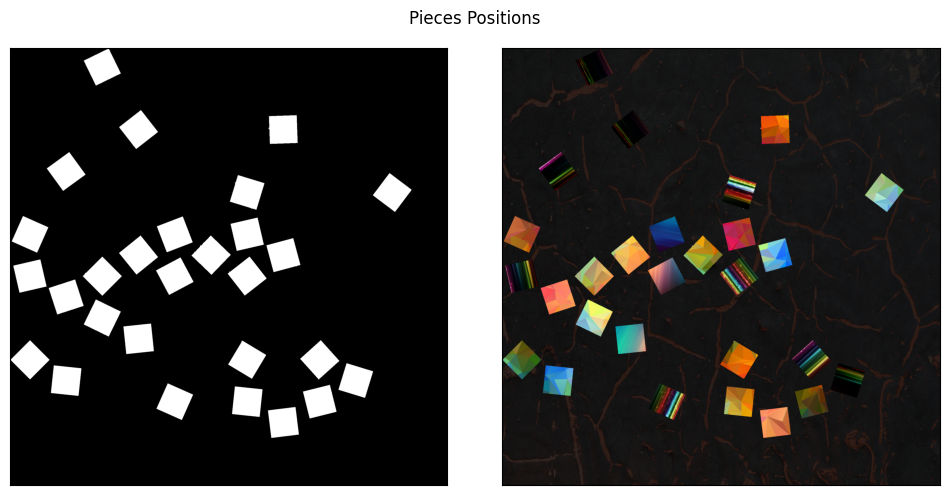

In [32]:
seg.plot_mask()

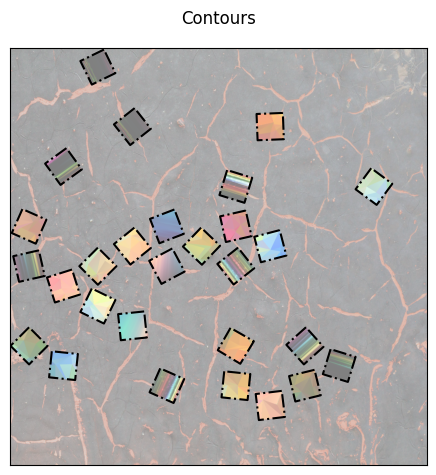

In [33]:
seg.plot_contours()

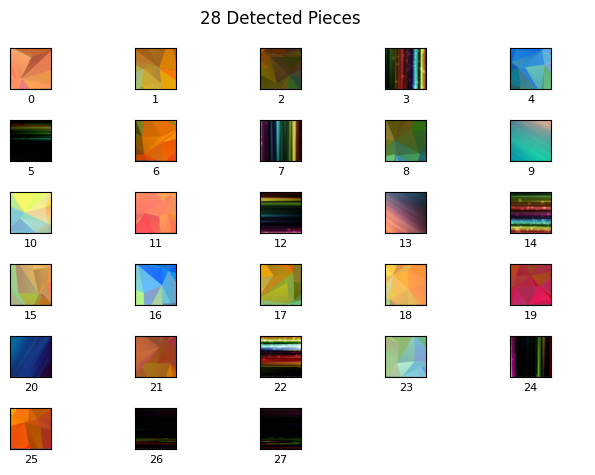

In [34]:
seg.plot_pieces()

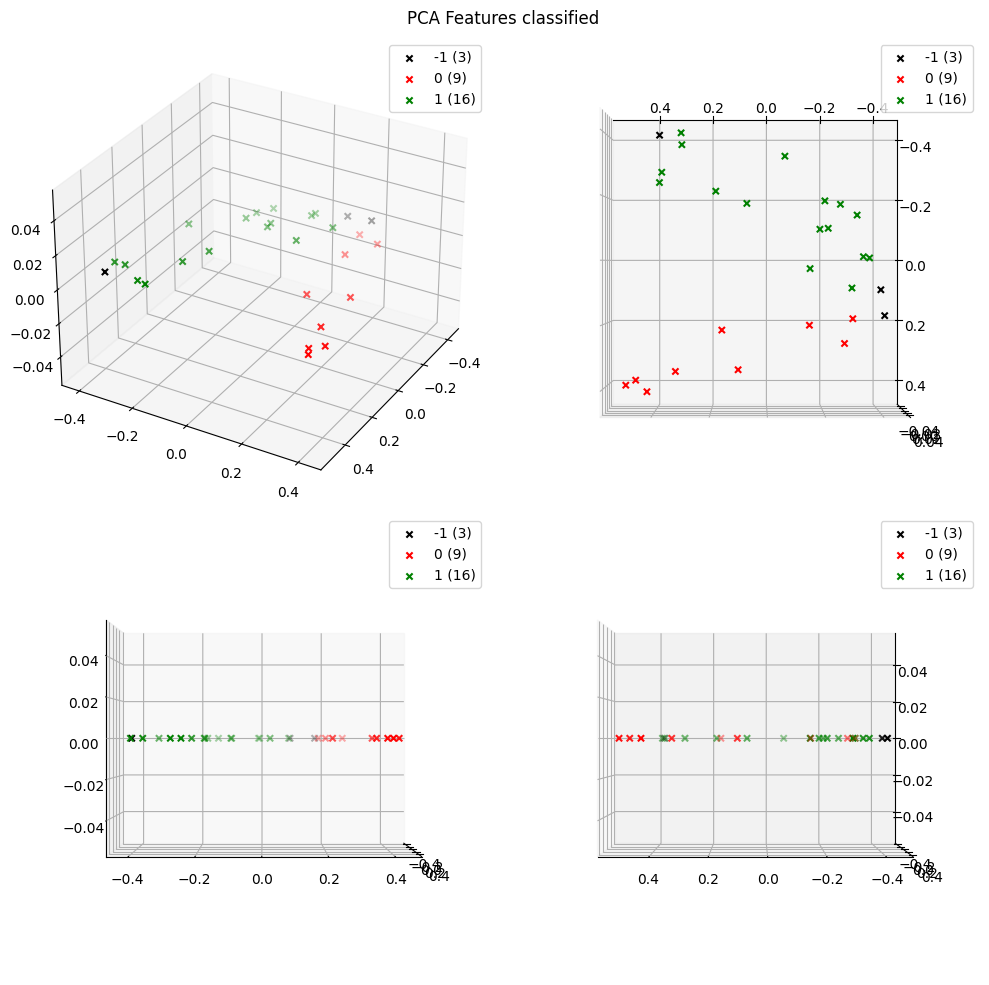

array([ 1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  0,  0,  0,  0])

In [35]:
features_extractor = FeaturesExtraction(seg.pieces)
features_extractor.find_features_PCA()

classifier = Classification(features_extractor.features_PCA)
classifier.classify(method=1)
classifier.classified_plot()
classifier.labels

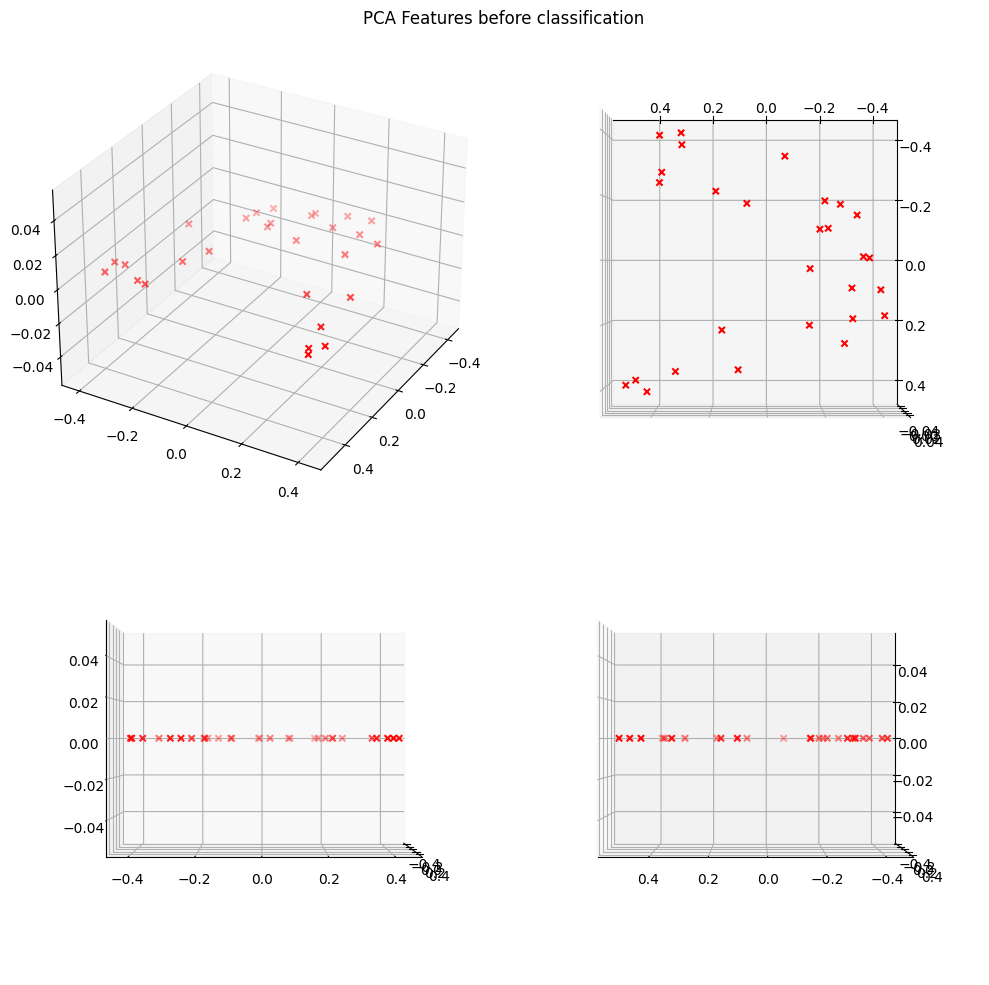

In [36]:
classifier.init_plot()

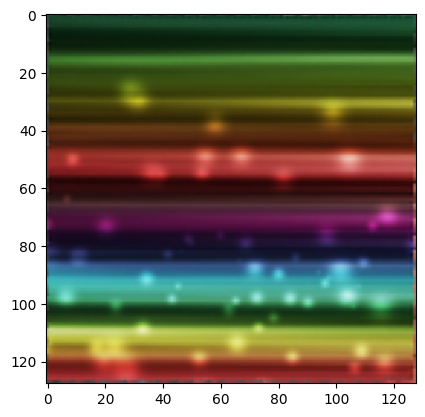

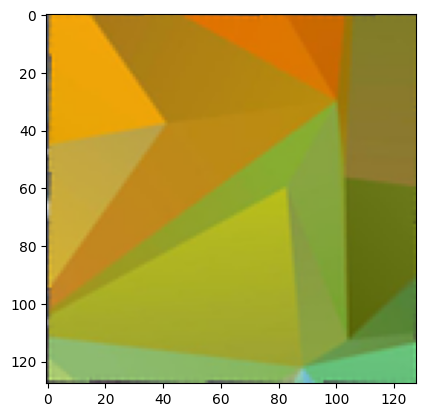

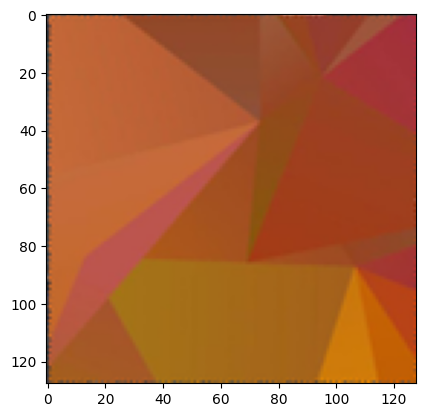

In [24]:
for i,label in enumerate(classifier.labels):
    if label==-1:
        plt.imshow(seg.pieces[i])
        plt.show()